# CO 544 Machine Learning and Data Mining Lab 04


In [1]:
folder = '/content/drive/MyDrive/CO544/Lab 4/'

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import dataset
# read the dataset. in tsv files tab separated data
gapminder_df = pd.read_csv(folder + 'gapminder.tsv', sep='\t') 
#Display first few rows
gapminder_df.head() # give first 5 entries by default


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# give first 10 entries
gapminder_df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


#### Let’s explore the statistics for the most recent year in the dataframe and create a new dataframe to store them.

In [5]:
# get the most recent year
recent_year = gapminder_df['year'].max()
print(recent_year)

2007


In [6]:
#Filter the dataframe based on the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year]
recent_year_df.head(10)


,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
71,Australia,Oceania,2007,81.235,20434176,34435.367440
83,Austria,Europe,2007,79.829,8199783,36126.492700
95,Bahrain,Asia,2007,75.635,708573,29796.048340
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
119,Belgium,Europe,2007,79.441,10392226,33692.605080


In [7]:
#Shape of the new dataframe
recent_year_df.shape

(142, 6)

##### The descriptive summary statistics of a dataframe can be generated using the pandas.describe() function. This includes mean, count, std deviation, percentiles, and min-max values of all the features. Let’s get an idea of how per-capita GDP (i.e., gdpPercap feature) was distributed across all of the countries during the most recent year.

In [8]:
recent_year_df['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

### Histograms


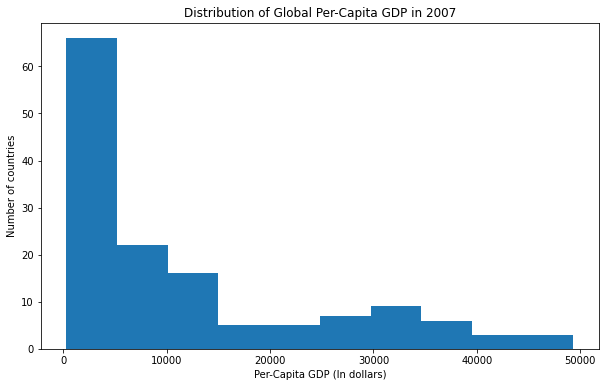

In [9]:
#Create a figure
plt.figure(figsize=(10, 6))
#Plot the histogram
plt.hist(recent_year_df['gdpPercap']);
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

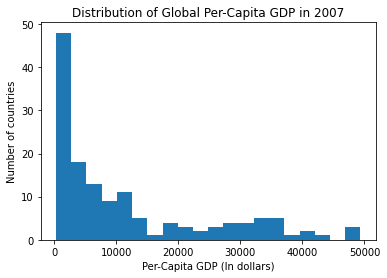

In [10]:
# bin size is 20
plt.hist(recent_year_df['gdpPercap'], bins=20)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

### **TODO 1:** Describe the distribution of data in histograms for different bin sizes. Briefly explain any mechanism for calculating the optimal number of bins in a histogram.

### Freedman–Diaconis rule can be used to select the width of the bins to be used in a histogram.Freedman-Diaconis rule not only considers the sample size but also considers the spread of the sample.
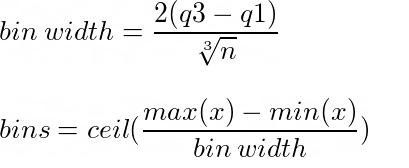


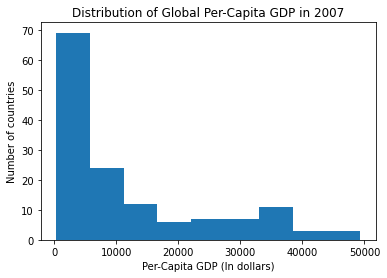

In [11]:
# bin size select using Freedman-Diaconis rule
plt.hist(recent_year_df['gdpPercap'], bins='auto')
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

###Bar plots


In [12]:
#New dataframe with selected features
countries_df = gapminder_df[['country', 'continent']]
#Drop duplicate combinations
countries_df = countries_df.drop_duplicates()
countries_df.shape

(142, 2)

In [13]:
countries_df.head()

,country,continent
0,Afghanistan,Asia
12,Albania,Europe
24,Algeria,Africa
36,Angola,Africa
48,Argentina,Americas


### To get the number of countries per continent, the groupby() method can be used. The count of unique counties in each continent is then tallied. Here, we use the as_index=False so that the continent name gets its own column, and is not used as the index.

In [14]:
country_counts_df = countries_df.groupby('continent', as_index=False).agg('count')
country_counts_df.head()

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [15]:
#plot bar plot
no_continents = len(country_counts_df)
x = range(no_continents)
print(x)


range(0, 5)


In [16]:
y = country_counts_df['country']

continents = country_counts_df['continent']
print(continents)

0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object


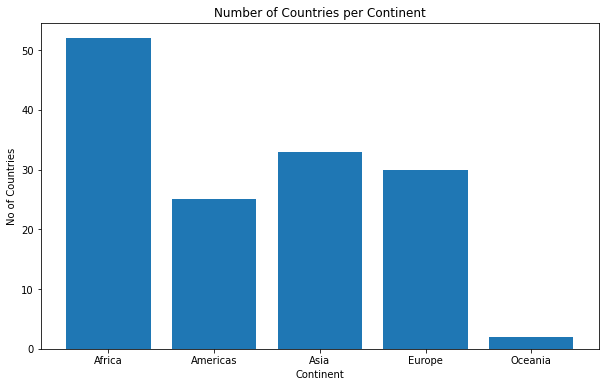

In [17]:
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('Continent')
plt.ylabel('No of Countries')
plt.title('Number of Countries per Continent')
plt.xticks(x, continents);

### 5. Box plots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


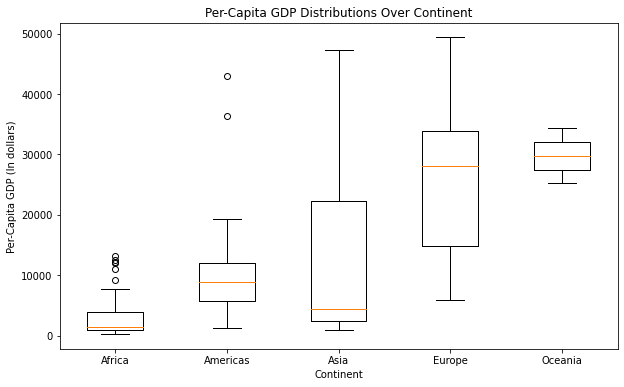

In [18]:
continent_gdp_recent = []

for c in continents:
  #New dataframe for current continent
  cur_cont = recent_year_df[recent_year_df['continent'] == c]
  #Store Per-capita GDP values of current continent in an array
  cur_cont_vals = cur_cont['gdpPercap'].values
  #Append values to the list
  continent_gdp_recent.append(cur_cont_vals)

plt.figure(figsize=(10, 6))
plt.boxplot(continent_gdp_recent)
plt.title('Per-Capita GDP Distributions Over Continent')
plt.xlabel('Continent')
plt.ylabel('Per-Capita GDP (In dollars)')
plt.xticks(range(1, len(continents) + 1), continents);

### 6. Line plots
####  Examine how the per capita GDP of Sri Lanka has changed over the years.

In [19]:
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']

lk.head()


,country,continent,year,lifeExp,pop,gdpPercap
1428,Sri Lanka,Asia,1952,57.593,7982342,1083.532030
1429,Sri Lanka,Asia,1957,61.456,9128546,1072.546602
1430,Sri Lanka,Asia,1962,62.192,10421936,1074.471960
1431,Sri Lanka,Asia,1967,64.266,11737396,1135.514326
1432,Sri Lanka,Asia,1972,65.042,13016733,1213.395530


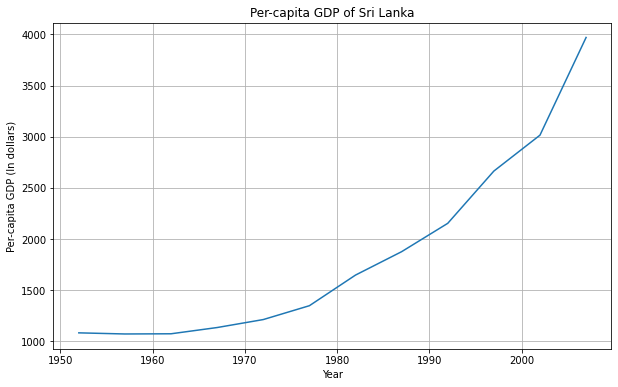

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'])
plt.title('Per-capita GDP of Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Per-capita GDP (In dollars)')
plt.grid();

### **TODO 2:** Compare how Sri Lanka’s per capita GDP has changed relative to its neighboring country India by plotting a second line plot on the same graph. Hint: Distinguish lines using a legend (an area describing the elements of a graph.)

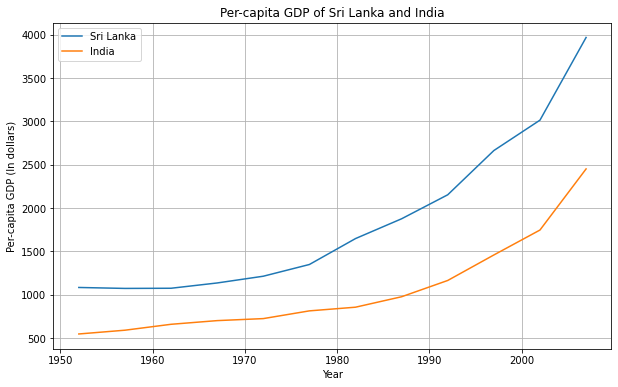

In [21]:
ind = gapminder_df[gapminder_df['country'] == 'India']

plt.figure(figsize=(10, 6))

#Sri Lanka 
x1 = lk['year']
y1 = lk['gdpPercap']
plt.plot(x1, y1, label = 'Sri Lanka')

#India
x2 = ind['year']
y2 = ind['gdpPercap']
plt.plot(x2, y2, label = 'India')


plt.title('Per-capita GDP of Sri Lanka and India')
plt.xlabel('Year')
plt.ylabel('Per-capita GDP (In dollars)')
plt.legend()
plt.grid();

### 7. Scatter plots
#### Visualize the relationship between the per capita GDP (gdpPercap on the x-axis) and life expectancy (lifeExp the y-axis) across all countries over the entire period.

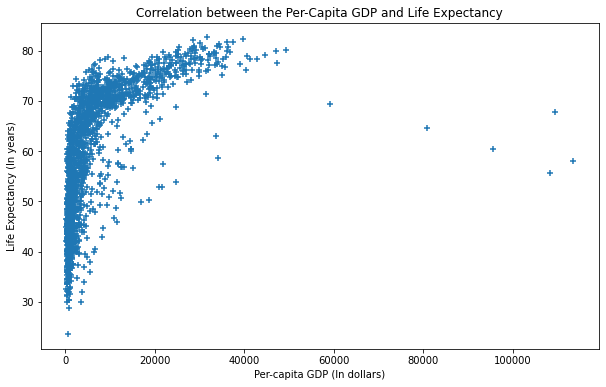

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(gapminder_df['gdpPercap'], gapminder_df['lifeExp'], marker='+')
plt.title('Correlation between the Per-Capita GDP and Life Expectancy')
plt.xlabel('Per-capita GDP (In dollars)')
plt.ylabel('Life Expectancy (In years)');

## 8. Heatmaps


In [23]:
per_continent_mean_gdp_df = gapminder_df.groupby(['continent', 'year'],
                                                 as_index=False)['gdpPercap'].mean()

In [24]:
per_continent_mean_gdp_df.head()

,continent,year,gdpPercap
0,Africa,1952,1252.572466
1,Africa,1957,1385.236062
2,Africa,1962,1598.078825
3,Africa,1967,2050.363801
4,Africa,1972,2339.615674


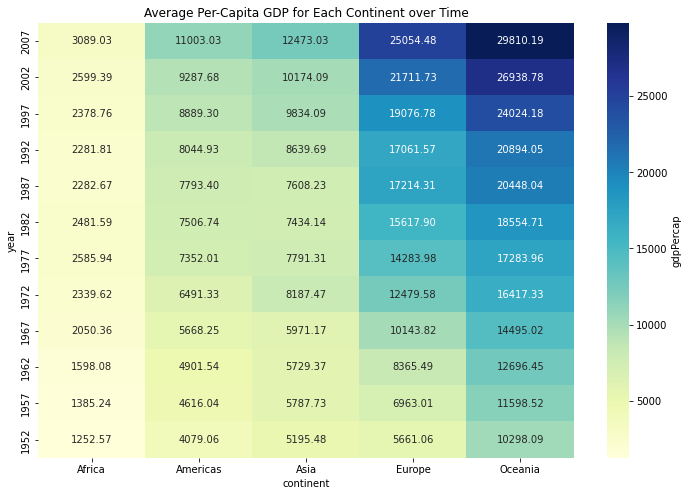

In [25]:
plt.figure(figsize=(12, 8))

heatmap = per_continent_mean_gdp_df.pivot(index='year',
                                          columns='continent',
                                          values='gdpPercap')

heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sns.heatmap(heatmap, annot=True, fmt=".2f", cmap='YlGnBu',
                            cbar_kws={'label': "gdpPercap"})

plt.title("Average Per-Capita GDP for Each Continent over Time");

## 9. Regression plots

Text(0, 0.5, 'Life Expectancy')

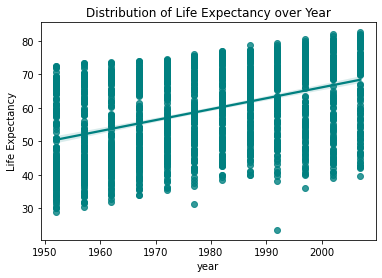

In [26]:
sns.regplot(x='year', y='lifeExp', data=gapminder_df, color='teal')
plt.title('Distribution of Life Expectancy over Year')
plt.xlabel('year')
plt.ylabel('Life Expectancy')

## 10. Kernel Density Estimate plots

Text(0.5, 1.0, 'Kernel Density Estimate Plot for the Distribution of Global Per-Capita GDP in 2007')

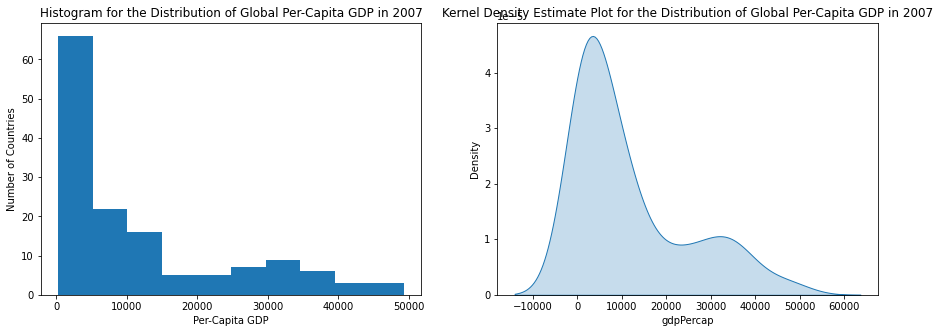

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(recent_year_df['gdpPercap'])
plt.xlabel('Per-Capita GDP')
plt.ylabel('Number of Countries')
plt.title('Histogram for the Distribution of Global Per-Capita GDP in 2007')

plt.subplot(1, 2, 2)
sns.kdeplot(recent_year_df['gdpPercap'], shade=True)
plt.title('Kernel Density Estimate Plot for the Distribution of Global Per-Capita GDP in 2007')

#save plot
#plt.savefig('plot.png', dpi=400, bbox_inches = 'tight')

## **TODO 3:**

### 1. Load the winequality red.csv file. (this is a dataset from UCI Machine Learning Repository open datasets)

In [32]:
# Import dataset
wine_quality_df = pd.read_csv(folder + 'winequality-red.csv', sep=';') 

In [33]:
wine_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


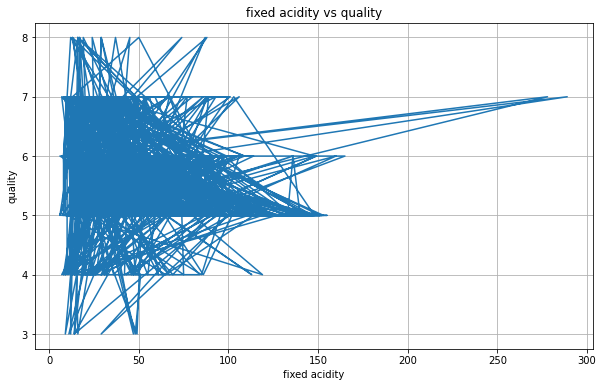

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(wine_quality_df['total sulfur dioxide'], wine_quality_df['quality'])
plt.title('fixed acidity vs quality')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.grid();